In [110]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import watermark
from tabulate import tabulate


# get rid of warnings
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from collections import Counter
# visualization
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
# Plot styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5
pd.set_option("max_colwidth", 250)

# Introduction

2020 was a year of extreme uncertainty. Throughout the year, VS's adopted new assumptions and predictions as the the pandemic shifted the cores of most industries. The primary role of any successful VC is to be able to forsee the evolution and potential of different industries.<br>
Given the worlds top 50 VC's early-stage investments throughout 2020, this analysis aims to identify key trends directions different industries are moving in. This analysis pulls data from over 250 early stage investments made in 2020 from 50 top-tier early-stage VCs (both international and local ones). <br> You can find a list of VCs covered at the end of this notebook. On top of the analysis, the database of companies pulled represent great potential investment opportunities (Founder emails are added)

### Import and Restructure Data

In [94]:
data = pd.read_excel('Investments2020_.xlsx')
data.rename(columns={'Last Financing Deal Type': 'Funding Type'}, inplace=True)
data.rename(columns={'Last Financing Deal Type 2': 'Funding Series'}, inplace=True)
#copy data set
data_na = data.copy()
data_na.dropna(inplace=True)
# data.fillna("", inplace=True)
# data.head()

In [95]:
data.head()

,Company Name,Funding Type,Funding Series,Last Financing Size,Last Financing Valuation,Total Raised,Last Financing Date,Primary Industry Group,Primary Industry Sector,All Industries,Verticals,HQ Location,Year Founded,Active Investors,Keywords,Website,Description,Primary Contact,Primary Contact Email
0,100Plus,Seed Round,Seed Round,15.0,NaN,15.00,2020-04-24,Healthcare Devices and Supplies,Healthcare,"Diagnostic Equipment*, Electronics (B2C), Media and Information Services (B2B)","Digital Health, TMT, Wearables & Quantified Self","San Francisco, CA",2016.0,"8VC, Ali Partovi, Ammunition Design Group, Band of Angels, Barry Volpert, City Light Capital, Correlation Ventures, CRCM Ventures, Frederick Goar, Hadi Partovi, Harald Ludwig, Henry Kravis, Joshua Kazam, K50 Ventures, Kairos HQ, Lodestar Ventures...","heart monitor, heart monitoring device, remote monitoring data, remote monitoring platform, remote monitoring system, remote patient monitoring device, remote patient monitoring system",www.100plus.com,"Developer of remote patient monitoring platform and devices intended to offer better care of elderly patients. The company's platform provides monitoring devices like blood pressure cuff, digital weight scale, emergency watch and blood glucose mo...",Ryan Howard,ryan@100plus.com
1,1upHealth,Early Stage VC,Series A,8.0,30.0,10.35,2020-02-05,Healthcare Technology Systems,Healthcare,"Medical Records Systems*, Other Healthcare Services, Other Healthcare Technology Systems","Digital Health, HealthTech, TMT","Boston, MA",2017.0,"Advisors.Fund, Boston Children's Hospital, Eniac Ventures, Innovation & Digital Health Accelerator, Jackson Square Ventures, MassChallenge, Meridian Street Capital, Office of the National Coordinator for Health Information Technology, Scala Ventu...","clinical hospital data, fhir api platform, health data, health data aggregation, medical data",www.1up.health,"Developer of a healthcare data platform designed for patients, providers and software developers to aggregate and share medical data. The company's platform tracks patient activity and automates secure data sharing from patients' electronic medic...",Ritwik Sahu,rsahu@1up.health
2,Abacus.AI,Early Stage VC,Series B,22.0,102.0,40.25,2020-10-23,Commercial Services,Business Products and Services (B2B),"Business/Productivity Software, IT Consulting and Outsourcing, Media and Information Services (B2B)*","Artificial Intelligence & Machine Learning, Big Data, SaaS, TMT","San Francisco, CA",2019.0,"Avichal Garg, Coatue Management, Decibel Partners, Deepchand Nishar, Don Burnette, Elad Gil, Eric Schmidt, Erica Shultz, Index Ventures, Jeannette Furstenberg, Jerry Yang, Kavitark Shriram, Keval Desai, Khosla Ventures, La Famiglia, Mariam Naficy...","artificial intelligence platform, artificial intelligence system, artificial intelligence technology, generative ai, machine learning, machine learning technology",www.abacus.ai,"Provider of an artificial intelligence platform designed to help organizations create large-scale, real-time customizable deep learning systems. The company's platform packages research on generative models and neural architecture search to deal ...",Bindu Reddy,bindu@abacus.ai
3,Able.,Later Stage VC,Series B,7.0,20.0,11.50,2020-02-10,Software,Information Technology,"Business/Productivity Software*, Human Capital Services","HR Tech, Mobile, SaaS","Cleveland, OH",2014.0,"JumpStart, M25, North Coast Ventures, Ohio Innovation Fund, Plymouth Growth, Rev1 Ventures","hiring platform, interview screening, online hiring, online hiring platform, paperless onboarding, recruitment platform, staffing solutions, temporary staffing agency",www.ableteams.com,"Developer of a cloud-based onboarding and candidate engagement platform designed to simplify the hiring process for high-volume employers. The company's engagement platform accommodates all the hiring processes, helps in leveraging the existing d...",Gerald Hetrick,gerald@employstream.com
4,Abnormal Securi

### Distribution of Features

In [96]:
#Aux plotting functions
def bar_plot(data, col_name):

    plt.figure(figsize = (15, 10))

    col_data = data[col_name].value_counts()
    x = list(col_data.index)
    y = list(col_data.values)

    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.title(col_name + "Bar Plot")
    plt.bar(x=x, height=y, width=0.9, color='#86bf91')

    col_data_percent = (col_data)/(col_data.sum())*100
    df = pd.DataFrame([col_data, col_data_percent])
    df.index = [col_name, "% of Total"]
    plt.xticks(rotation=90);
    
    return df


def hist_plot(title, col, col_name, bins):
    ax = col.hist(bins=bins, grid=False, figsize=(8,6), color='#86bf91', zorder=2, rwidth=0.9)
    
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.figure(figsize = (15, 10))
    # Draw horizontal axis lines
    vals = ax.get_yticks()
    for tick in vals:
        ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    ax.set_title(title, weight='bold', size=16)

    # Set x-axis label
    ax.set_xlabel(col_name, labelpad=20, weight='bold', size=12)

    # Set y-axis label
    ax.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)
    
    series = col.value_counts()
    series_percent = (series)/(series.sum())*100
    exit_df = pd.DataFrame([series, series_percent])
    exit_df.index = [col_name, "% of Total"]
    plt.xticks(rotation=90);
    
    return exit_df

def plot_stacked(data, seed, early, later, col_name, counts):    
    HQ_10_df = data[col_name].value_counts().index[:counts]
    HQ_10_seed = data_seed.loc[data_seed[col_name].isin(HQ_10_df)]
    HQ_10_early = data_early.loc[data_early[col_name].isin(HQ_10_df)]
    HQ_10_later = data_later.loc[data_later[col_name].isin(HQ_10_df)]
    plt.figure(figsize = (15, 10))
    #edit seed HQ so shapes are all equal
    HQ_10_seed = HQ_10_seed[col_name].value_counts().sort_index()
    if col_name == 'HQ Location':
        MV = pd.Series([0], index=["Mountain View, CA"])
        HQ_10_seed = HQ_10_seed.append(MV).sort_index()
    
    HQ_10_early = HQ_10_early[col_name].value_counts().sort_index()
    HQ_10_later = HQ_10_later[col_name].value_counts().sort_index()

    d = {'Seed' : HQ_10_seed, 
          'Early' : HQ_10_early,
        'Later' : HQ_10_later} 
    
    df_grouped = pd.DataFrame(d)
    if col_name == 'Year Founded':
        df_grouped.index = df_grouped.index.map(str)

    fields = ['Seed','Early','Later']
    colors = ['#1D2F6F', '#8390FA', '#86bf91']
    labels = ['Seed','Early','Later']
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
    # plot bars
    left = len(df_grouped) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
        left = left + df_grouped[name]
    # title, legend, labels
    plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
    plt.xlabel('Frequency')
    # remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    plt.show()
    
    
def plot_stacked_vert(data_seed, data_early, data_later, col_name):   
    data_seed.fillna("", inplace=True)
    data_early.fillna("", inplace=True)
    data_later.fillna("", inplace=True)
    counts_seed = count_verticals(data_seed, col_name)
    counts_seed = delete_non_rel_vert(counts_seed)
    #order data by most common verticals
    verticals_seed = counts_seed.most_common(20)
    verticals_seed

    counts_early = count_verticals(data_early, col_name)
    counts_early = delete_non_rel_vert(counts_early)
    #order data by most common verticals
    verticals_early = counts_early.most_common(20)
    verticals_early


    counts_later = count_verticals(data_later, col_name)
    counts_later = delete_non_rel_vert(counts_later)
    #order data by most common verticals
    verticals_later = counts_later.most_common(20)

    df_seed = pd.DataFrame(verticals_seed, columns=[col_name, "Seed"])
    df_early = pd.DataFrame(verticals_early, columns=[col_name, "Early"])
    df_later = pd.DataFrame(verticals_later, columns=[col_name, "Later"])

    # df_seed
    df_all = pd.merge(df_seed, df_early,on=[col_name])
    df_all = pd.merge(df_all, df_later,on=[col_name])
    df_all.set_index(col_name, inplace=True)
    df_all

    df_grouped = df_all.copy()
    fields = ['Seed','Early','Later']
    colors = ['#1D2F6F', '#8390FA', '#86bf91']
    labels = ['Seed','Early','Later']
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
    # plot bars
    left = len(df_grouped) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
        left = left + df_grouped[name]
    # title, legend, labels
    plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
    plt.xlabel('Frequency')
    # remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    plt.show()

,Later Stage VC,Early Stage VC,Seed Round,Corporate
Funding Type,347.000000,320.000000,228.000000,4.000000
% of Total,38.598443,35.595106,25.361513,0.444939


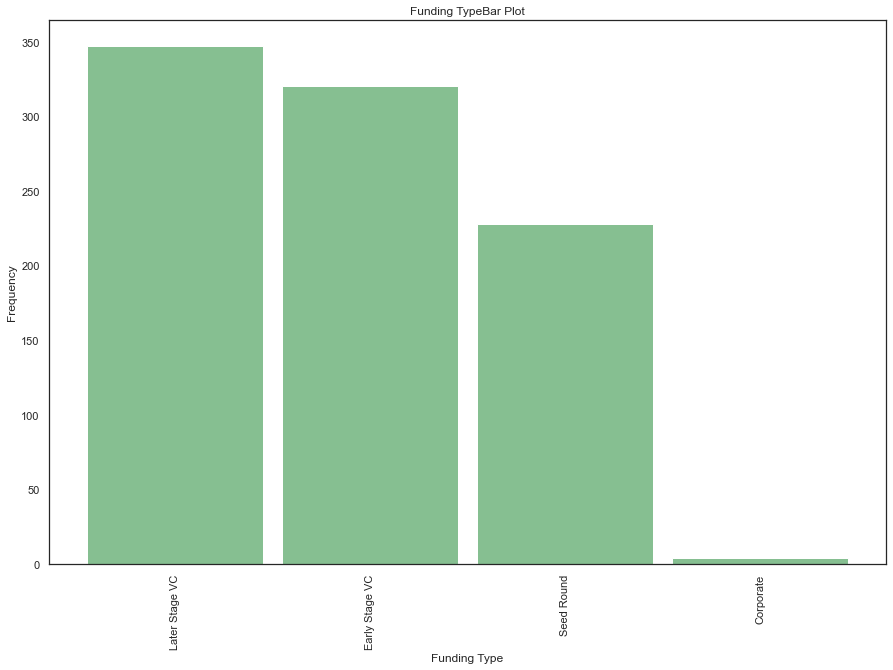

In [97]:
bar_plot(data, "Funding Type")

### Financing Round Size Distribution Per Investment Stage

In [98]:
#seperate data by Stage
data_seed = data[data['Funding Type'] == "Seed Round"]
data_early = data[data['Funding Type'] == "Early Stage VC"]
data_later = data[data['Funding Type'] == "Later Stage VC"]

Seed Average Funding Size and Median are: 4.724956140350877 and 3.725
Early (A/B) Average Funding Size and Median are: 27.1169375 and 17.0
Later (C+) Average Funding Size and Median are: 78.22610951008646 and 45.0


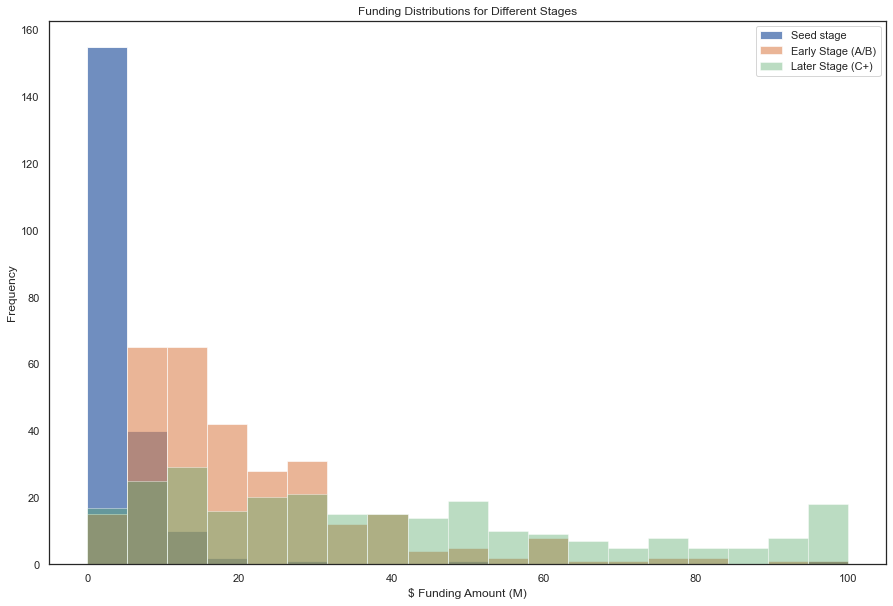

In [99]:
seed = data_seed['Last Financing Size']
early = data_early['Last Financing Size']
later = data_later['Last Financing Size']
print("Seed Average Funding Size and Median are: {} and {}".format(seed.sum()/len(seed), seed.median()))
print("Early (A/B) Average Funding Size and Median are: {} and {}".format(early.sum()/len(early), early.median()))
print("Later (C+) Average Funding Size and Median are: {} and {}".format(later.sum()/len(later), later.median()))
bins = np.linspace(0, 100, 20)
plt.figure(figsize = (15, 10))
plt.hist(seed, bins, alpha=0.8, label='Seed stage')
plt.hist(early, bins, alpha=0.6, label='Early Stage (A/B)')
plt.hist(later, bins, alpha=0.4, label='Later Stage (C+)')
plt.legend(loc='upper right')
plt.xlabel("$ Funding Amount (M)")
plt.ylabel("Frequency")
plt.title("Funding Distributions for Different Stages");

Seed Average Financing Valuation and Median are: 11.433026315789474 and 13.75
Early (A/B) Average Financing Valuation and Median are: 63.80340625 and 65.76
Later (C+) Average Financing Valuation and Median are: 575.9915850144092 and 365.0


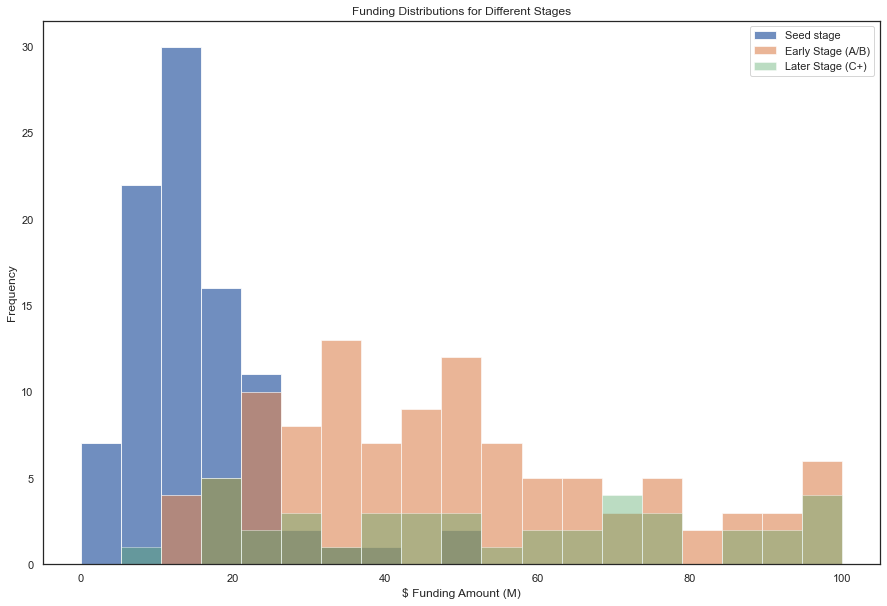

In [100]:
seed = data_seed['Last Financing Valuation']
early = data_early['Last Financing Valuation']
later = data_later['Last Financing Valuation']
print("Seed Average Financing Valuation and Median are: {} and {}".format(seed.sum()/len(seed), seed.median()))
print("Early (A/B) Average Financing Valuation and Median are: {} and {}".format(early.sum()/len(early), early.median()))
print("Later (C+) Average Financing Valuation and Median are: {} and {}".format(later.sum()/len(later), later.median()))
bins = np.linspace(0, 100, 20)
plt.figure(figsize = (15, 10))
plt.hist(seed, bins, alpha=0.8, label='Seed stage')
plt.hist(early, bins, alpha=0.6, label='Early Stage (A/B)')
plt.hist(later, bins, alpha=0.4, label='Later Stage (C+)')
plt.legend(loc='upper right')
plt.xlabel("$ Funding Amount (M)")
plt.ylabel("Frequency")
plt.title("Funding Distributions for Different Stages");

### Plot Investments Stages Per HQ Location

<Figure size 1080x720 with 0 Axes>

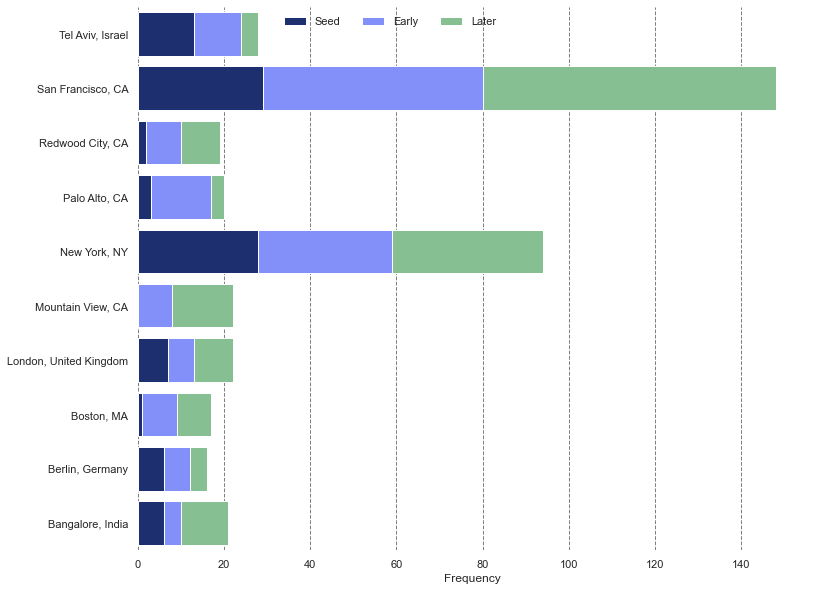

In [101]:
plot_stacked(data, data_seed, data_early, data_later, 'HQ Location', 10)

### Plot Investments Stages Per Founded Dates

<Figure size 1080x720 with 0 Axes>

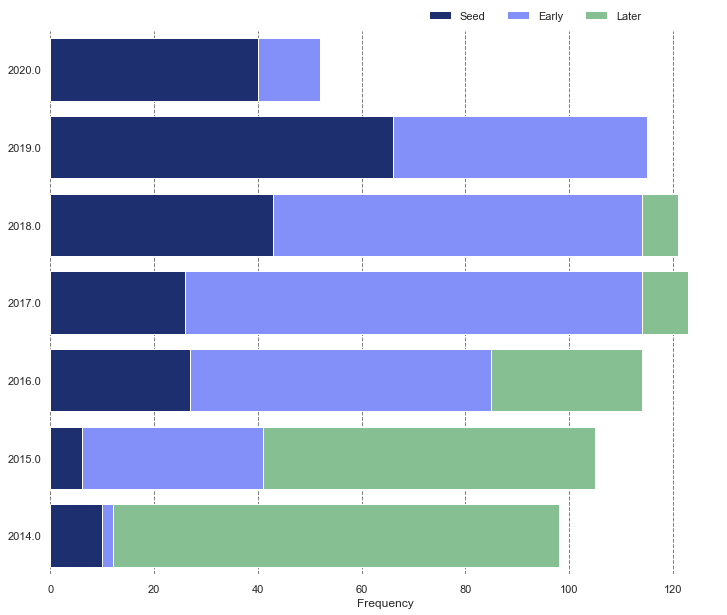

In [102]:
plot_stacked(data, data_seed, data_early, data_later, 'Year Founded', 7)

# Analysis of Industry Trends

In [103]:
#Aux Functions
#break down each column by row types which are a string into a list and concat them Ex: "AI, FinTech, Life Sciences" -->> ["AI, FinTech, Life Sciences"]
def count_verticals(data, col_name):    

    verticals_list = []
    #iterate over the entire "verticals" column
    for index, row in data.iterrows():
        #accevalue_countstical value

        verticals_list = verticals_list + (row[col_name].replace(", ", ",").replace("*", "").split(","))

    return Counter(verticals_list)  

words_to_del_list = [' TMT', 'TMT', ' SaaS', 'SaaS', 'Artificial Intelligence & Machine Learning', '', ' Mobile', 'Mobile', ' Artificial Intelligence & Machine Learning', ' Mobile Commerce']
def delete_non_rel_vert(counts, list_=words_to_del_list):
    for word in list_:
        del counts[word]
    return counts
    

In [104]:
data.fillna("", inplace=True)
data.head()

# clean data with the functions above
counts = count_verticals(data, "Verticals")
counts = delete_non_rel_vert(counts)
#order data by most common verticals
verticals = counts.most_common(20)
verticals

[('Big Data', 142),
 ('FinTech', 119),
 ('HealthTech', 79),
 ('Cybersecurity', 67),
 ('E-Commerce', 62),
 ('CloudTech & DevOps', 57),
 ('Life Sciences', 56),
 ('Digital Health', 38),
 ('Mobility Tech', 38),
 ('LOHAS & Wellness', 31),
 ('InsurTech', 30),
 ('Internet of Things', 28),
 ('Industrials', 27),
 ('Robotics and Drones', 26),
 ('HR Tech', 24),
 ('Supply Chain Tech', 24),
 ('FoodTech', 22),
 ('EdTech', 22),
 ('Marketing Tech', 19),
 ('CleanTech', 18)]

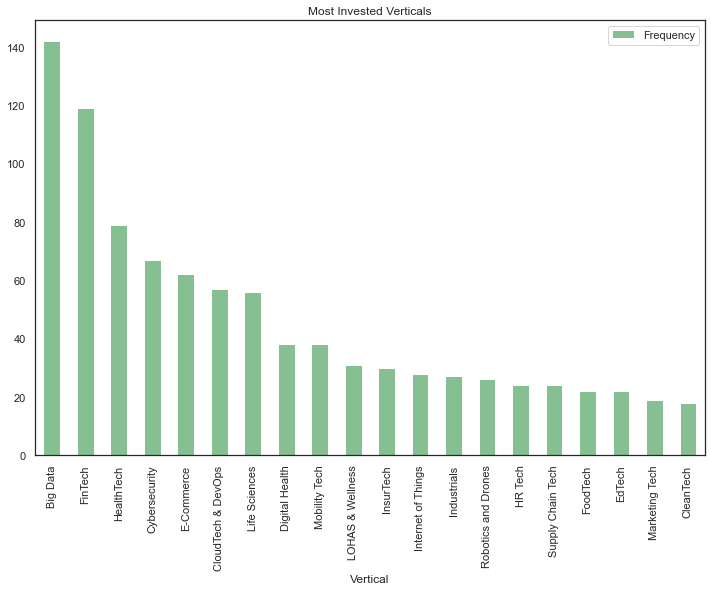

In [105]:
df = pd.DataFrame(verticals, columns=['Vertical', 'Frequency'])
df.plot(kind='bar', x='Vertical', y="Frequency", title="Most Invested Verticals" ,color='#86bf91', zorder=2, figsize=(12,8));

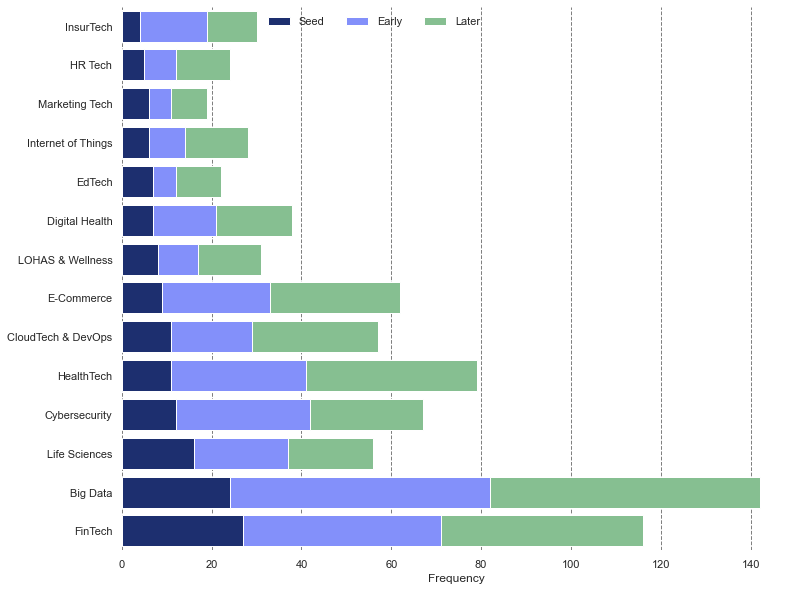

In [106]:
plot_stacked_vert(data_seed, data_early, data_later, "Verticals")

[('Business/Productivity Software', 396),
 ('Media and Information Services (B2B)', 142),
 ('Application Software', 106),
 ('Financial Software', 97),
 ('Network Management Software', 72),
 ('Automation/Workflow Software', 65),
 ('Other Healthcare Technology Systems', 62),
 ('Other Financial Services', 60),
 ('Information Services (B2C)', 57),
 ('Database Software', 54),
 ('Software Development Applications', 51),
 ('Biotechnology', 50),
 ('Social/Platform Software', 34),
 ('Other Healthcare Services', 30),
 ('Logistics', 30),
 ('Internet Retail', 30),
 ('Communication Software', 28),
 ('Drug Discovery', 27),
 ('Entertainment Software', 27),
 ('Human Capital Services', 26)]

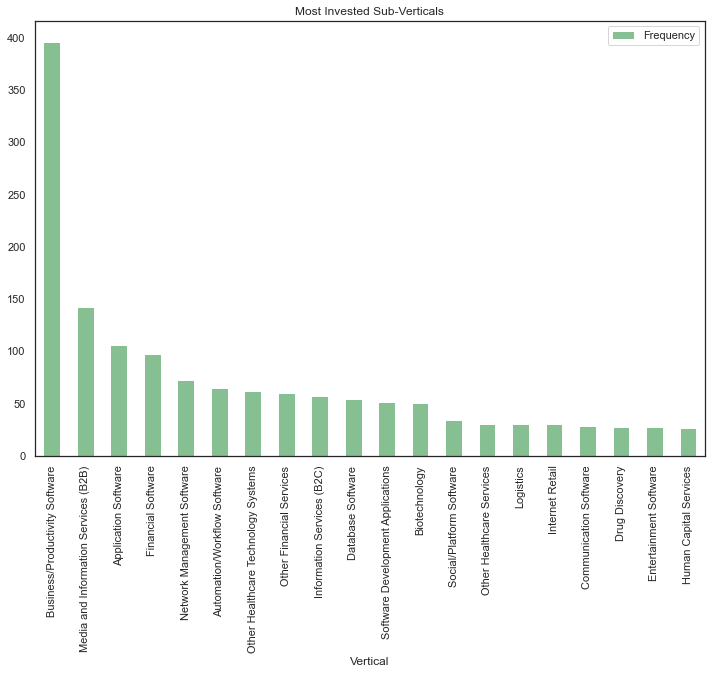

In [107]:
# clean data with the functions above
counts = count_verticals(data, "All Industries")
counts = delete_non_rel_vert(counts)
#order data by most common verticals
verticals = counts.most_common(20)
df = pd.DataFrame(verticals, columns=['Vertical', 'Frequency'])
df.plot(kind='bar', x='Vertical', y="Frequency", title="Most Invested Sub-Verticals" ,color='#86bf91', zorder=2, figsize=(12,8));
verticals

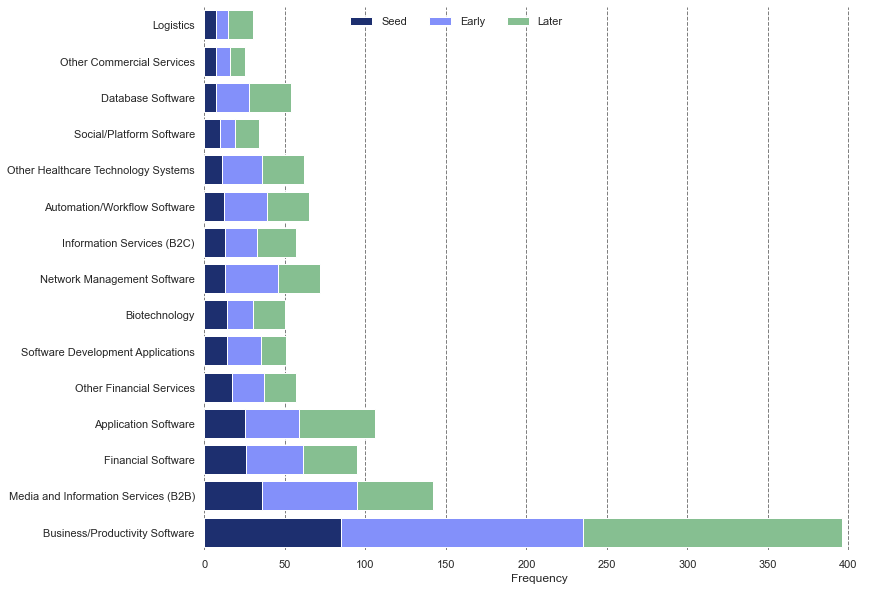

In [108]:
plot_stacked_vert(data_seed, data_early, data_later, "All Industries")

# Deeper Dive

# key Take Aways: Overview

#### 1) Improving short-term productivity is the most popular focus

#### 2) Digitization is the new trend, with a focus on SMEs and emerging markets

#### 3) FinTech is still hot with companies applying existing technologies/business models to new markets/new demographic groups and solving niche problems

#### 4) Remote working is not just about video meeting but means an entirely new workforce management system and a totally different working experience


***

## Trend 1: Productivity tools, Propelled By The Shift to Work-From-Home (WFH)

While productivity tools have been rising in popularity over the years, working from home has created a new industry paradigm. There were **107 companies tagged as Business/Productivity Tools, and Communication Software**. <br> 
Even though these startups are not making huge disruptive innovations, their value added is straightforward and short-term. 

Productivity tools can be broken down into **two groups**:
1. Workflow Automation
2. Data Integration/Visualization:

This space is very hot this year because of the following reasons:

1. **Rise in the number of SaaS aaplications being used by companies ---> tools needed to consolidate those platforms to improve productivity.**
2. **Difficulty to collaborate because of WFH ---> tools are needed to help employees to collaborate.**
3. **Advancements in AI paired with increase in companier offering AI-as-a-service ---> companies can more accuratley solve automated/semi-automated tasks.**
4. **Volatile investment environment ---> VCs potentially looking for low risk products that offer immediate value to customers**


**Conclusion:** <br>
Given that there are too many platforms/tools being used within a single company, a strong trend in companies understanding/integrating/visualization has arisen whereby startups are leveraging existing services APIs from Slack, Salesforce, BIs, DBs etc. <br>to build a platform that enables people to search data, send commands, plan workflows, and sync data across different platforms in one place, essentially increasing productivity and removing data silos. However, it seems that there is a minimal technical entry barrier <br> for many of the productivity tools that these startups are working with. Furthermore, there also seems to be questions marks around scalability in this space, given the relative simplicity to develop similar products.


**Companies**: Sorted by largest seed financing

In [ ]:
# clean data with the functions above
# counts = count_verticals(df1, "Description")
# counts = delete_non_rel_vert(counts)
# #order data by most common verticals
# verticals = counts.most_common(20)
# verticals

### Quantum Drug Discovery

In [64]:
drug_disc_comps = data[data['Description'].str.contains("quantum")]
# drug_disc_comps = drug_disc_comps[drug_disc_comps['Keywords'].str.contains("quantum")]
drug_disc_comps 

,Company Name,Funding Type,Funding Series,Last Financing Size,Last Financing Valuation,Total Raised,Last Financing Date,Primary Industry Group,Primary Industry Sector,All Industries,Verticals,HQ Location,Year Founded,Active Investors,Keywords,Website,Description,Primary Contact,Primary Contact Email
66,Authomize,Seed Round,Seed Round,6.00,14.75,6.00,2020-06-08,Software,Information Technology,"Automation/Workflow Software*, Business/Produc...","Artificial Intelligence & Machine Learning, SaaS","Tel Aviv, Israel",2019.0,"Blumberg Capital, Entrée Capital, M12","analytics engine, cloud services, identity man...",www.authomize.com,Developer of cloud-based identity management s...,NaN,NaN
352,Horizon Quantum Computing,Seed Round,Seed Round,3.21,NaN,4.08,2020-06-23,Software,Information Technology,Software Development Applications*,"SaaS, TMT","Singapore, Singapore",2018.0,"Abies Ventures, Data Collective, Grupo Posadas...","application development, computing device, dat...",www.horizonquantum.com,Developer of computer programming tools intend...,Joseph Fitzsimons,joe@horizonquantum.com
477,Menten AI,Seed Round,Seed Round,4.00,NaN,4.15,2020-06-30,Pharmaceuticals and Biotechnology,Healthcare,"Biotechnology*, Discovery Tools (Healthcare), ...","Artificial Intelligence & Machine Learning, Li...","San Francisco, CA",2018.0,"FoundersX Ventures, Khosla Ventures, Social Im...","artificial intelligence, de novo proteins, enz...",www.menten.ai,Developer of a machine learning and quantum co...,Hans Melo,hans@menten.ai


### AI-Dev Platforms

In [65]:
ai_comps = data_na[data_na['Verticals'].str.contains("Artificial Intelligence & Machine Learning")]
ai_comps = ai_comps[ai_comps['Keywords'].str.contains("platform|Platform")]
ai_comps = ai_comps[ai_comps['Description'].str.contains("artificial intelligence platform|enterprise AI platform|end-to-end|data science")]
pd.set_option("max_colwidth", 250)
ai_comps

,Company Name,Funding Type,Funding Series,Last Financing Size,Last Financing Valuation,Total Raised,Last Financing Date,Primary Industry Group,Primary Industry Sector,All Industries,Verticals,HQ Location,Year Founded,Active Investors,Keywords,Website,Description,Primary Contact,Primary Contact Email
2,Abacus.AI,Early Stage VC,Series B,22.00,102.00,40.25,2020-10-23,Commercial Services,Business Products and Services (B2B),"Business/Productivity Software, IT Consulting and Outsourcing, Media and Information Services (B2B)*","Artificial Intelligence & Machine Learning, Big Data, SaaS, TMT","San Francisco, CA",2019.0,"Avichal Garg, Coatue Management, Decibel Partners, Deepchand Nishar, Don Burnette, Elad Gil, Eric Schmidt, Erica Shultz, Index Ventures, Jeannette Furstenberg, Jerry Yang, Kavitark Shriram, Keval Desai, Khosla Ventures, La Famiglia, Mariam Naficy...","artificial intelligence platform, artificial intelligence system, artificial intelligence technology, generative ai, machine learning, machine learning technology",www.abacus.ai,"Provider of an artificial intelligence platform designed to help organizations create large-scale, real-time customizable deep learning systems. The company's platform packages research on generative models and neural architecture search to deal ...",Bindu Reddy,bindu@abacus.ai
198,DataRobot,Later Stage VC,Series F,317.09,2817.09,748.21,2020-12-09,Software,Information Technology,"Automation/Workflow Software, Business/Productivity Software*, IT Consulting and Outsourcing","Artificial Intelligence & Machine Learning, Big Data","Boston, MA",2012.0,"Accomplice VC, Alex Oppenheimer, AllianceBernstein, Altimeter Capital Management, AMK Investment Office, Atlas Venture, B Capital Group, BlackRock, Cisco Investments, ClearBridge, CSC UpShot Ventures, Department of Homeland Security Science and T...","augmented analytics, augmented analytics platform, automated machine learning platform, machine learning platform, statistical modeling",www.datarobot.com,"Developer of an enterprise AI platform designed to accelerate data science by automating the end-to-end journey from data to value. The company's platform democratizes data science with end-to-end automation for building, deploying, and managing ...",Jeremy Achin,jeremy@datarobot.com
223,Domino Data Lab,Later Stage VC,Series E,43.00,342.99,123.60,2020-05-27,Software,Information Technology,"Business/Productivity Software*, Social/Platform Software","Artificial Intelligence & Machine Learning, Big Data, SaaS, TMT","San Francisco, CA",2013.0,"Ashley Fontana, Bloomberg Beta, Coatue Management, Dell Technologies Capital, Highland Capital (Bishkek), Highland Europe, In-Q-Tel, Sequoia Capital, Slow Ventures, The Dcode Group, Zetta Venture Partners","analytics app, analytics workflow application, artificial intelligence analytics, data analysis, data mining technology, machine learning analytics technology, machine learning infrastructure, ml observability, ml solution, predictive analytics, ...",www.dominodatalab.com,"Developer of a data science platform intended to help companies to develop and deploy ideas faster with collaborative, reusable, reproducible analysis. The company's platform permits thousands of data scientists to develop medicines, grow product...",Nicholas Elprin,nick@dominodatalab.com
562,Pachyderm,Later Stage VC,Series B,17.20,92.20,29.32,2020-08-19,Software,Information Technology,"Business/Productivity Software, Database Software*","Artificial Intelligence & Machine Learning, Big Data, SaaS, TMT","San Francisco, CA",2014.0,"ACE & Company, Avichal Garg, Benchmark (San Francisco), Blumberg Capital, Blumberg Capital Partners, Caffeinated Capital, Data Collective, Decibel Partners, Foundation Capital, Jonathan Abrams, M12, Paul Buchheit, Soma Capital, Susa Ventures, Tue...","artificial intelligence, big data processing, data analytics, data analytics forum, data analytics product, data lineage, data pipeline, data science, data science technolo

In [ ]:
prod_comps
# prod_comps.sort_values(by="Last Financing Size", ascending=False)

In [ ]:
prod_comps = data[data['Verticals'].str.contains("FinTech")]

counts = count_verticals(prod_comps, "All Industries")
counts = delete_non_rel_vert(counts)
#order data by most common verticals
verticals = counts.most_common(20)
verticals
# prod_comps = prod_comps[prod_comps['All Industries'].str.contains("B2B")]

# prod_comps
# prod_comps = prod_comps[['Company Name', 'Website', 'All Industries', 'Last Financing Size', 'Active Investors', 'HQ Location', 'Description', 'Primary Contact Email']]
# pd.set_option("max_colwidth", None)
# prod_comps.sort_values(by="Last Financing Size", ascending=False)

In [ ]:
prod_comps = prod_comps[prod_comps['Keywords'].str.contains("lending")]


In [ ]:
prod_comps

In [ ]:

# IL = prod_comps = IL[IL['All Industries'].str.contains("Business/Productivity Software")]

In [ ]:
IL

VC Funds: **8VC, Accel, ALLVP, Alumni Ventures Group, Andreessen Horowitz, Bain Capital Ventures, Benchmark, Bessemer Venture Partners, Canary, First Round Capital, Foundation Capital, Founders Fund, General Catalyst, GGV Capital, Global Founders Capital, Gradient Ventures, Greylock, GV, Index Ventures, Initialized Capital, Jerusalem Venture Partners (JVP), Khosla Ventures, Kleiner Perkins, Lightspeed China Partners, Lightspeed India Partners, Lightspeed Venture Partners, Lowercase Capital, Magma Venture Partners, Menlo Ventures, Monashees, New Enterprise Associates, Differential Ventures, Sequoia Capital, Sequoia Capital (SSF), Sequoia Capital China, Sequoia Capital India, Sequoia Capital Israel, Social Capital, SV Angel, True Ventures, Two Sigma Ventures, Venrock, Vertex Ventures, Vertex Ventures Israel, Team8, Viola, Pitango, Cyberstarts, UpWest, 83North**

#### Print dependences

In [122]:
%load_ext watermark

%watermark -v -m -p pandas,numpy,watermark,seaborn,matplotlib,tabulate,xlrd

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

pandas    : 1.0.5
numpy     : 1.18.5
watermark : 2.2.0
seaborn   : 0.10.1
matplotlib: 3.2.2
tabulate  : 0.8.8
xlrd      : 1.2.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [123]:
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas 1.0.5
numpy 1.18.5
seaborn 0.10.1
watermark 2.2.0


In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import watermark
from tabulate import tabulate


# get rid of warnings
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from collections import Counter
# visualization
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
# Plot styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5
pd.set_option("max_colwidth", 250)